In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tf_keras
import tensorflow_hub as hub
import cv2
import pathlib
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [7]:
model = tf_keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape = (224, 224, 3))
])

In [8]:
img = cv2.imread("goldfish.jpg")
img = cv2.resize(img, (224, 224))

In [9]:
img = img / 225

In [10]:
pred = model.predict(img[np.newaxis, ...])

1/1 [==============================] - 7s 7s/step


In [11]:
np.argmax(pred)

2

In [12]:
classes = []
with open("ImageNetLabels.txt", "r") as f:
  classes = f.read().splitlines()

In [13]:
classes[np.argmax(pred)]

'goldfish'

In [14]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 39s 0us/step


In [15]:
dir = pathlib.Path(data_dir)

In [16]:
image_dict = {
    'roses': list(dir.glob('*/roses/*')),
    'daisy': list(dir.glob('*/daisy/*')),
    'dandelion': list(dir.glob('*/dandelion/*')),
    'sunflowers': list(dir.glob('*/sunflowers/*')),
    'tulips': list(dir.glob('*/tulips/*'))
}

In [17]:
flower_label_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [18]:
X, y = [], []
for flower_name, images in image_dict.items():
  for image in images:
    img = cv2.imread(image)
    resized_img = cv2.resize(img, (224, 224))
    X.append(resized_img)
    y.append(flower_label_dict[flower_name])

In [19]:
X = np.array(X)
y = np.array(y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
X_train = X_train / 255
X_test = X_test / 225

In [77]:
modelb = tf_keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", input_shape = (224, 224, 3), trainable = False),
    tf_keras.layers.Dense(5, activation = 'softmax')
])

In [78]:
modelb.compile(optimizer = 'adam', loss = keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

In [79]:
modelb.fit(X_train, y_train, epochs = 5)

Epoch 1/5
86/86 [==============================] - 62s 601ms/step - loss: 0.8742 - accuracy: 0.6693
Epoch 2/5
86/86 [==============================] - 52s 602ms/step - loss: 0.4195 - accuracy: 0.8594
Epoch 3/5
86/86 [==============================] - 52s 605ms/step - loss: 0.3270 - accuracy: 0.8972
Epoch 4/5
86/86 [==============================] - 54s 623ms/step - loss: 0.2737 - accuracy: 0.9146
Epoch 5/5
86/86 [==============================] - 53s 611ms/step - loss: 0.2363 - accuracy: 0.9288


In [82]:
y_pred = modelb.predict(X_test)

29/29 [==============================] - 19s 609ms/step


In [84]:
y_pred.shape

(918, 5)

In [85]:
y_pred_max = np.argmax(y_pred, axis = 1)

In [86]:
y_pred_max

array([2, 0, 1, 3, 2, 3, 3, 0, 3, 0, 1, 2, 1, 4, 2, 2, 1, 0, 0, 3, 2, 4,
       1, 1, 2, 4, 2, 0, 0, 1, 2, 1, 0, 1, 3, 0, 4, 4, 4, 1, 2, 0, 0, 2,
       2, 0, 4, 0, 4, 4, 2, 1, 0, 4, 0, 4, 2, 4, 0, 2, 2, 1, 0, 0, 0, 1,
       4, 1, 0, 1, 3, 0, 2, 0, 4, 2, 0, 1, 2, 3, 4, 4, 1, 3, 4, 2, 2, 3,
       3, 1, 1, 0, 0, 0, 2, 4, 2, 0, 0, 3, 4, 0, 3, 1, 3, 3, 0, 3, 3, 3,
       2, 4, 2, 2, 2, 3, 4, 3, 4, 1, 3, 1, 2, 2, 4, 4, 3, 3, 0, 3, 0, 2,
       4, 4, 3, 2, 2, 4, 0, 4, 0, 3, 3, 1, 2, 1, 2, 4, 3, 4, 3, 2, 2, 1,
       3, 0, 3, 4, 1, 4, 2, 2, 0, 2, 3, 3, 2, 2, 4, 4, 4, 0, 4, 3, 0, 3,
       3, 0, 4, 2, 2, 3, 0, 4, 3, 1, 2, 4, 2, 3, 3, 4, 4, 3, 2, 3, 3, 4,
       1, 3, 2, 2, 2, 1, 2, 4, 4, 3, 4, 2, 3, 4, 3, 3, 2, 2, 3, 2, 1, 4,
       2, 4, 4, 3, 0, 0, 0, 4, 2, 0, 3, 4, 2, 4, 3, 4, 4, 1, 2, 1, 4, 4,
       0, 3, 0, 0, 0, 1, 4, 4, 0, 3, 1, 4, 0, 0, 0, 2, 2, 2, 2, 0, 4, 1,
       4, 2, 2, 1, 2, 0, 2, 4, 3, 4, 0, 2, 2, 2, 4, 2, 2, 0, 2, 2, 4, 3,
       4, 1, 0, 2, 2, 2, 4, 4, 2, 2, 3, 1, 0, 1, 2,

In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_max))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       169
           1       0.83      0.86      0.85       133
           2       0.93      0.92      0.93       234
           3       0.89      0.85      0.87       175
           4       0.85      0.85      0.85       207

    accuracy                           0.87       918
   macro avg       0.87      0.87      0.87       918
weighted avg       0.87      0.87      0.87       918



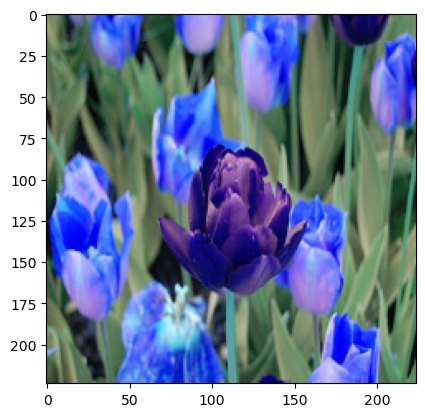

In [107]:
plt.imshow(X[3000])

In [101]:
samp = X[2000]
samp = samp / 225
pred = modelb.predict(samp[np.newaxis, ...])

1/1 [==============================] - 0s 65ms/step


In [102]:
np.argmax(pred)

2